In [21]:
# importing needed libraries 
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Importing and organizing the data

In [22]:
# importing dataset that comes with seaborn
import seaborn as sns
iris = sns.load_dataset('iris')

# check first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\drake\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


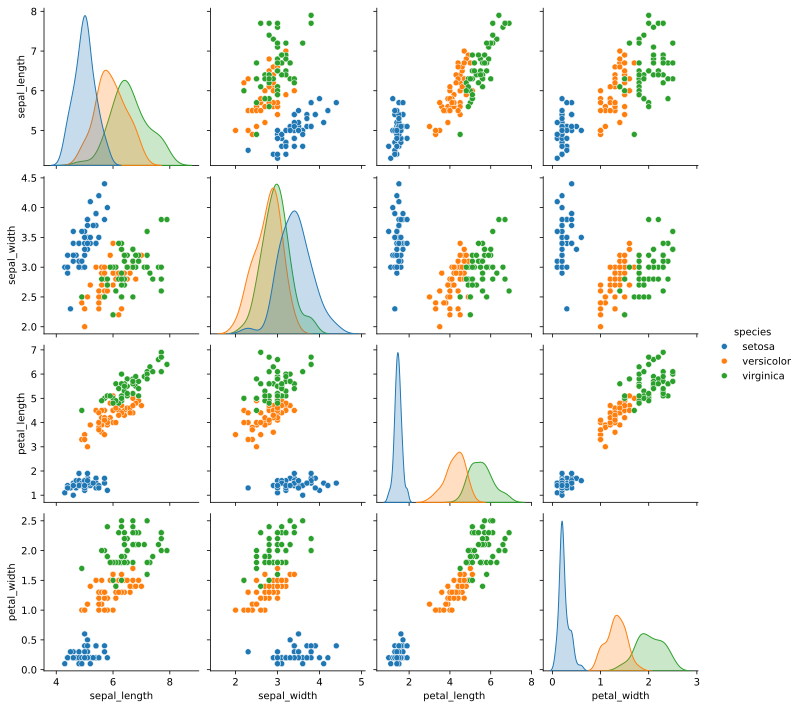

In [23]:
# plots to display the data
sns.pairplot(iris, hue='species')

In [24]:
# organizing the data 
# converting from pandas to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()
print("Data Shape:", data.shape)

# transforming species to number
labels = torch.zeros(len(data),dtype=torch.long)
print("Label Shape:",labels.shape)
# labels[iris.species == 'setosa'] = 0 # don't need since everything is already 0
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

labels

Data Shape: torch.Size([150, 4])
Label Shape: torch.Size([150])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Functions to create and train the model

In [25]:
def createIrisANN(nHidden):
    # model architecture with number of hidden units as a variable
    IrisANN = nn.Sequential(
        nn.Linear(4,nHidden),           # input layer
        nn.ReLU(),                      # activation unit
        nn.Linear(nHidden,nHidden),     # hidden layer
        nn.ReLU(),                      # activation unit
        nn.Linear(nHidden,3),           # output unit
    )

    # loss function
    lossFunction = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(IrisANN.parameters(),lr=.01)

    return IrisANN, lossFunction, optimizer

In [26]:
def trainModel(IrisANN, numEpochs, lossFunction, optimizer):
    # initialize losses
    losses = torch.zeros(numEpochs)
    ongoingAccuracy = []

    # loop over epochs
    for epochIDX in range(numEpochs):

        # forward pass
        yHat = IrisANN(data)

        # compute loss
        loss = lossFunction(yHat, labels)
        losses[epochIDX] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # computing accuracy
        matches = torch.argmax(yHat, axis=1) == labels      # convert to bool
        matchesNumeric = matches.float()                    # convert to 0 or 1
        accuracyPercent = 100*torch.mean(matchesNumeric)    # take avg and *100
        ongoingAccuracy.append(accuracyPercent)

    # final forward pass
    predictions = IrisANN(data)
    predLabels = torch.argmax(predictions,axis=1)
    totalACC = 100*torch.mean((predLabels == labels).float())
    return totalACC

# Running the experiment

In [27]:
numEpochs = 150
numHiddenLayers = np.arange(1,129)
accuracies = []

for numHidden in numHiddenLayers:
    # create fresh model instance
    IrisANN, lossFunction, optimizer = createIrisANN(numHidden)

    # running the model
    acc = trainModel(IrisANN, numEpochs, lossFunction, optimizer)
    accuracies.append(acc)

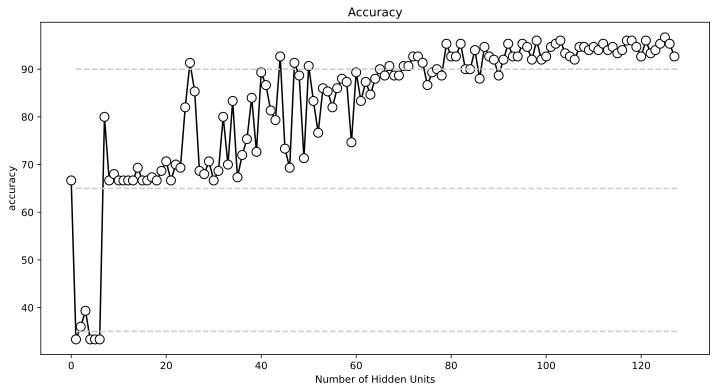

In [32]:
# visualizing accuracy
fix, ax = plt.subplots(1,figsize=(12,6))

ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numHiddenLayers[[0,-1]],[35,35],'--',color=[.8,.8,.8])
ax.plot(numHiddenLayers[[0,-1]],[65,65],'--',color=[.8,.8,.8])
ax.plot(numHiddenLayers[[0,-1]],[90,90],'--',color=[.8,.8,.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of Hidden Units')
ax.set_title('Accuracy')
plt.show()